<h2><center>ASSIGNMENT 4</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 41</center></h2>
<h2><center>Q: CM5</center></h2>

<p>All the necessary code blocks used to achieve the best resulting fully connected CNN for this classification problem on fashion mnist data.</p>
<ul>
    <li>SELECTING BEST ARCHITECTURE</li>
    <li>SELECTING BEST ACTIVATION FUNCTION</li>
    <li>SELECTING BEST OPTIMIZATION</li>
</ul>

# CODE BLOCKS TO GET BEST ARCHITECTURE FOR OUR MODEL

## PREPARATION OF DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
dataset = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True)
data_dict = np.array(dataset)

values = data_dict[()]['features']
labels = data_dict[()]['target']

features = []
for i in range(60000):
    features.append(values[i].flatten())
features = np.array(features)

final_features = pd.DataFrame(features)
final_features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


In [3]:
from sklearn.preprocessing import OneHotEncoder
labels = pd.DataFrame(labels, columns = ['output'])

In [4]:
categorical_cols = ['output']
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)
encoded_labels = encoder.fit_transform(labels[categorical_cols])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, encoded_labels, test_size = 0.1, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## CNN MODEL 1 (BEST PERFORMING ARCHITECTURE)
## ACTIVATION FUNCTION 1: RELU
## OPTIMIZATION ALGORITHM 1: ADAM

In [6]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 2, activation = 'relu', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(Dropout(drop_rate_1))

cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 4, activation = 'relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))


# second and third hidden layer
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 96)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 96)        384       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 256)       393472    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [8]:
# Compiling the model 
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
filepath = 'best_model_2.wts.h5'

fitted_model = cnn.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 0.8264 - accuracy: 0.6874
Epoch 00001: val_loss improved from inf to 1.49754, saving model to best_model_2.wts.h5
81/81 [==============================] - 118s 1s/step - loss: 0.8264 - accuracy: 0.6874 - val_loss: 1.4975 - val_accuracy: 0.6752
Epoch 2/100
81/81 [==============================] - ETA: 0s - loss: 0.4262 - accuracy: 0.8301
Epoch 00002: val_loss improved from 1.49754 to 1.41948, saving model to best_model_2.wts.h5
81/81 [==============================] - 119s 1s/step - loss: 0.4262 - accuracy: 0.8301 - val_loss: 1.4195 - val_accuracy: 0.7628
Epoch 3/100
81/81 [==============================] - ETA: 0s - loss: 0.3255 - accuracy: 0.8699
Epoch 00003: val_loss improved from 1.41948 to 1.27396, saving model to best_model_2.wts.h5
81/81 [==============================] - 131s 2s/step - loss: 0.3255 - accuracy: 0.8699 - val_loss: 1.2740 - val_accuracy: 0.8283
Epoch 4/100
81/81 [==============================] - 

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 96)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 96)        384       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 256)       393472    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

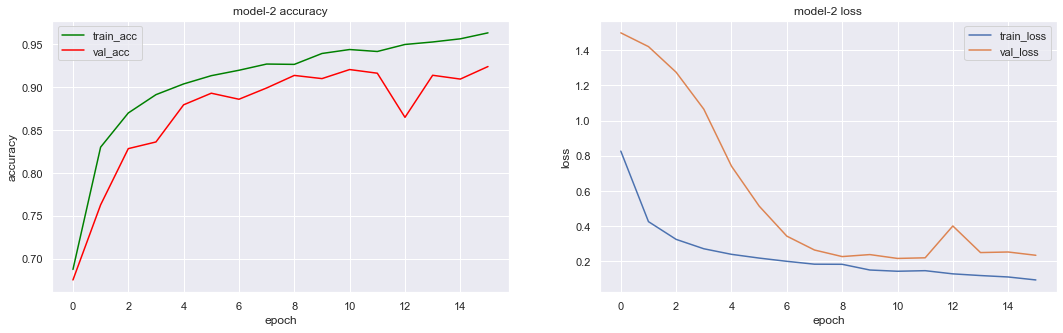

In [11]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-2 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model.history['loss'], label = 'train_loss')
plt.plot(fitted_model.history['val_loss'], label = 'val_loss')
plt.title('model-2 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [12]:
print("Mean val acc:", np.mean(fitted_model.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model.history['loss']))

Mean val acc: 0.870787039399147
Mean val loss: 0.572948538698256
Mean train acc: 0.9072672352194786
Mean train loss: 0.2363970410078764


In [13]:
# we re-load the best weights once training is finished
filepath = 'best_model_2.wts.h5'
cnn.load_weights(filepath)

In [14]:
y_pred = cnn.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [15]:
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append('1')
            elif j == 1:
                true_values.append('2')
            elif j == 2:
                true_values.append('3')
            elif j == 3:
                true_values.append('4')
            elif j == 4:
                true_values.append('5')

In [16]:
result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append('1')
            elif j == 1:
                result.append('2')
            elif j == 2:
                result.append('3')
            elif j == 3:
                result.append('4')
            elif j == 4:
                result.append('5')

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(true_values, result)

0.9168333333333333

<P>We observe that there our model gives an accuracy of 91.68% on the test set, which is very close to the accuracies obtained on the training and the validation sets.</P>

## CNN MODEL 2

In [18]:
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.25  # Dropping Rate

cnn_2 = tf.keras.models.Sequential()
cnn_2.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 2, strides = (2,2), padding='valid', activation = 'relu', input_shape = [28,28,1]))
cnn_2.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 7, strides = (2,2), padding='valid', activation = 'relu', input_shape = [28,28,1]))
cnn_2.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding='valid'))
cnn_2.add(Dropout(drop_rate_1))

cnn_2.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn_2.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))


# second and third hidden layer
cnn_2.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn_2.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn_2.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [19]:
# Compiling the model 
cnn_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 5)

fitted_model_2 = cnn_2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ callback ])

Epoch 1/100
81/81 [==============================] - 64s 791ms/step - loss: 0.8215 - accuracy: 0.6469 - val_loss: 0.5522 - val_accuracy: 0.7772
Epoch 2/100
81/81 [==============================] - 66s 810ms/step - loss: 0.4912 - accuracy: 0.8023 - val_loss: 0.4015 - val_accuracy: 0.8426
Epoch 3/100
81/81 [==============================] - 65s 807ms/step - loss: 0.4062 - accuracy: 0.8355 - val_loss: 0.3666 - val_accuracy: 0.8494
Epoch 4/100
81/81 [==============================] - 64s 794ms/step - loss: 0.3546 - accuracy: 0.8570 - val_loss: 0.3242 - val_accuracy: 0.8737
Epoch 5/100
81/81 [==============================] - 65s 808ms/step - loss: 0.3364 - accuracy: 0.8636 - val_loss: 0.3088 - val_accuracy: 0.8778
Epoch 6/100
81/81 [==============================] - 65s 798ms/step - loss: 0.3122 - accuracy: 0.8745 - val_loss: 0.2971 - val_accuracy: 0.8848
Epoch 7/100
81/81 [==============================] - 64s 796ms/step - loss: 0.3000 - accuracy: 0.8800 - val_loss: 0.2977 - val_accuracy:

In [21]:
cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 256)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 96)          1204320   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 96)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               197120    
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

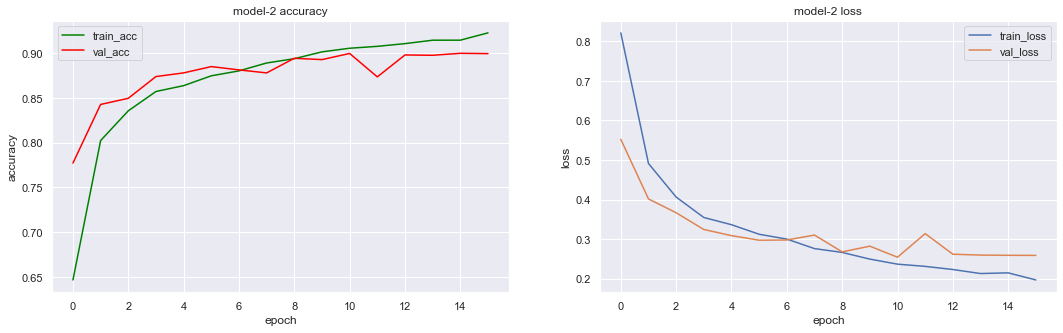

In [22]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_2.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_2.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-2 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_2.history['loss'], label = 'train_loss')
plt.plot(fitted_model_2.history['val_loss'], label = 'val_loss')
plt.title('model-2 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [23]:
print("Mean val acc:", np.mean(fitted_model_2.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_2.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_2.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_2.history['loss']))

Mean val acc: 0.8761226870119572
Mean val loss: 0.31343600898981094
Mean train acc: 0.8698456771671772
Mean train loss: 0.3205251833423972


In [24]:
y_pred = cnn_2.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append('1')
            elif j == 1:
                true_values.append('2')
            elif j == 2:
                true_values.append('3')
            elif j == 3:
                true_values.append('4')
            elif j == 4:
                true_values.append('5')
                
result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append('1')
            elif j == 1:
                result.append('2')
            elif j == 2:
                result.append('3')
            elif j == 3:
                result.append('4')
            elif j == 4:
                result.append('5')

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(true_values, result)

0.904

<P>We observe that there our model gives an accuracy of 90.40% on the test set, which is very close to the accuracies obtained on the training and the validation sets.</P>

## CNN MODEL 3

In [26]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn_3 = tf.keras.models.Sequential()
cnn_3.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = [28,28,1]))
cnn_3.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn_3.add(tf.keras.layers.BatchNormalization())
cnn_3.add(Dropout(drop_rate_1))

cnn_3.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 4, activation = 'relu'))
cnn_3.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn_3.add(tf.keras.layers.BatchNormalization())
cnn_3.add(Dropout(drop_rate_1))

cnn_3.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
cnn_3.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_3.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn_3.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))


# second and third hidden layer
cnn_3.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn_3.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn_3.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

# Compiling the model 
cnn_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
cnn_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 5, 64)         

In [28]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
#filepath = 'best_model_timepass.wts.h5'
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_3 = cnn_3.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ callback ])

Epoch 1/100
81/81 [==============================] - 21s 258ms/step - loss: 0.6091 - accuracy: 0.7524 - val_loss: 1.7823 - val_accuracy: 0.2004
Epoch 2/100
81/81 [==============================] - 23s 282ms/step - loss: 0.3909 - accuracy: 0.8403 - val_loss: 1.9473 - val_accuracy: 0.2004
Epoch 3/100
81/81 [==============================] - 23s 283ms/step - loss: 0.3246 - accuracy: 0.8691 - val_loss: 1.7474 - val_accuracy: 0.3454
Epoch 4/100
81/81 [==============================] - 21s 265ms/step - loss: 0.3015 - accuracy: 0.8774 - val_loss: 1.6591 - val_accuracy: 0.3330
Epoch 5/100
81/81 [==============================] - 22s 277ms/step - loss: 0.2848 - accuracy: 0.8853 - val_loss: 1.1966 - val_accuracy: 0.5335
Epoch 6/100
81/81 [==============================] - 23s 289ms/step - loss: 0.2564 - accuracy: 0.8982 - val_loss: 0.9711 - val_accuracy: 0.6580
Epoch 7/100
81/81 [==============================] - 23s 280ms/step - loss: 0.2463 - accuracy: 0.9018 - val_loss: 0.6641 - val_accuracy:

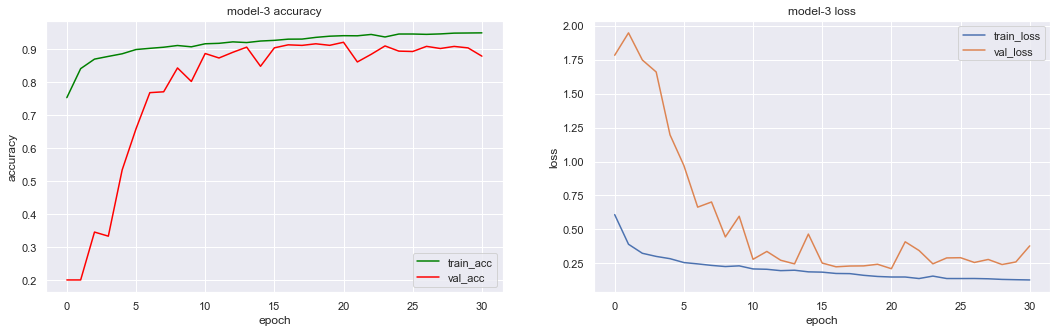

In [29]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_3.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_3.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-3 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_3.history['loss'], label = 'train_loss')
plt.plot(fitted_model_3.history['val_loss'], label = 'val_loss')
plt.title('model-3 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [30]:
print("Mean val acc:", np.mean(fitted_model_3.history['val_accuracy']))
print("Mean train acc:", np.mean(fitted_model_3.history['accuracy']))
print("Mean val loss:", np.mean(fitted_model_3.history['val_loss']))
print("Mean train loss:", np.mean(fitted_model_3.history['loss']))

Mean val acc: 0.7826941436336886
Mean train acc: 0.9157175056395992
Mean val loss: 0.571339645693379
Mean train loss: 0.20964131239921815


In [31]:
y_pred = cnn_3.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append('1')
            elif j == 1:
                true_values.append('2')
            elif j == 2:
                true_values.append('3')
            elif j == 3:
                true_values.append('4')
            elif j == 4:
                true_values.append('5')
result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append('1')
            elif j == 1:
                result.append('2')
            elif j == 2:
                result.append('3')
            elif j == 3:
                result.append('4')
            elif j == 4:
                result.append('5')

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(true_values, result)

0.8773333333333333

<P>We observe that there our model gives an accuracy of 87.73% on the test set, which is very close to the accuracies obtained on the training and the validation sets.</P>

<P>Final comparison of results and run time performance are reported in a tabular form in CM6</P>